In [3]:
# The IMDB sentiment classification dataset consists of 50,000 movie reviews from IMDB users that are labeled as either positive (1) or negative (0). 
# The reviews are preprocessed and each one is encoded as a sequence of word indexes in the form of integers.
# The words within the reviews are indexed by their overall frequency within the dataset. For example, the integer “2” encodes the second most frequent word in the data.
# The 50,000 reviews are split into 25,000 for training and 25,000 for testing.
# Text Process word by word at diffrent timestamp ( You may use RNN(Recurrent Neural Network) LSTM(Long Short-Term Memory) GRU(Gated Recurrent Unit))
# convert input text to vector reprent input text
# DOMAIN: Digital content and entertainment industry
# CONTEXT: The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.
# DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). 
# Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). 
# For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word.
# Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. 
# As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

# PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.
import numpy as np
import pandas as pd

In [4]:
#loading imdb data with most frequent 10000 words

from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000) # you may take top 10,000 word frequently review of movies
#consolidating data for EDA(exploratory data analysis: involves gathering all the relevant data into one place and preparing it for analysis )
data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)


In [5]:
print("Review is ",X_train[5]) # series of no converted word to vocabulory associated with index
print("Review is ",y_train[5]) # 0 indicating a negative review and 1 indicating a positive review.

Review is  [1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
Review is  0


In [6]:
vocab=imdb.get_word_index() #The code you provided retrieves the word index for the IMDB dataset
print(vocab) 

{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028, 'zaniacs': 52130, '275': 34706, 'consenting': 27631, 'snuggled': 408

In [7]:
data #data is a numpy array that contains all the text data from the IMDB dataset, both the training and testing sets.

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [8]:
label #label is a numpy array that contains all the sentiment labels from the IMDB dataset, both the training and testing sets.0 indicates a negative review and 1 indicates a positive review.

array([1, 0, 0, ..., 0, 0, 0])

In [9]:
X_train.shape

(25000,)

In [10]:
X_test.shape

(25000,)

In [11]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
y_test # y_test is 25000, which indicates that it contains 25000 sentiment labels, one for each review in the testing set.

array([0, 1, 1, ..., 0, 0, 0])

In [13]:
# Function to perform relevant sequence adding on the data
# Now it is time to prepare our data. We will vectorize every review and fill it with zeros so that it contains exactly 1000 numbers. 
# That means we fill every review that is shorter than 500 with zeros. 
# We do this because the biggest review is nearly that long and every input for our neural network needs to have the same size. 
# We also transform the targets into floats.
# sequences is name of method the review less than 1000 we perform padding overthere

def vectorize(sequences, dimension = 10000):
  # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# The script transforms your dataset into a binary vector space model.
# First, if we examine the x_train content we see that each review is represented as a sequence of word ids. Each word id corresponds to one specific word:
# print(train_data[0])  # print the first review
# [1, 14, 22, 16, 43, 530, 973, ..., 5345, 19, 178, 32]
# the size of the entire dictionary, dictionary=10000 in your example. 
# We will then associate each element/index of this vector with one word/word_id. 
# So word represented by word id 14 will now be represented by 14-th element of this vector.


# Each element will either be 0 (word is not present in the review) or 1 (word is present in the review). 
# And we can treat this as a probability, so we even have meaning for values in between 0 and 1. 
# Furthermore, every review will now be represented by this very long (sparse) vector which has a constant length for every review.
# word      word_id
# I      -> 0
# you    -> 1
# he     -> 2
# be     -> 3
# eat    -> 4
# happy  -> 5
# sad    -> 6
# banana -> 7
# a      -> 8

# the sentences would then be processed in a following way.


# I be happy      -> [0,3,5]   -> [1,0,0,1,0,1,0,0,0]
# I eat a banana. -> [0,4,8,7] -> [1,0,0,0,1,0,0,1,1]

# Now I highlighted the word sparse. 
# That means, there will have A LOT MORE zeros in comparison with ones. 
# We can take advantage of that. Instead of checking every word, whether it is contained in a review or not; 
# we will check a substantially smaller list of only those words that DO appear in our review.

# Therefore, we can make things easy for us and create reviews × vocabulary matrix of zeros right away by np.zeros((len(sequences), dimension))
# And then just go through words in each review and flip the indicator to 1.0 at position corresponding to that word:

# result[review_id][word_id] = 1.0
# So instead of doing 25000 x 10000 = 250 000 000 operations, 
# we only did number of words = 5 967 841. That's just ~2.5% of original amount of operations.


# The for loop here is not processing all the matrix. As you can see, it enumerates elements of the sequence, so it's looping only on one dimension. Let's take a simple example :
# t = np.array([1,2,3,4,5,6,7,8,9])
# r = np.zeros((len(t), 10))

#Output

# array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#   [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#   [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#   [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
# [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) #

# then we modify elements with the same way you have :

# for i, s in enumerate(t):
#  r[i,s] = 1.
# array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
#   [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
#   [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
#   [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
#   [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
#   [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
#   [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
#   [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
#   [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
  # you can see that the for loop modified only a set of elements (len(t))
  # which has index [i,s] (in this case ; (0, 1), (1, 2), (2, 3), an so on))

In [14]:
# Now we split our data into a training and a testing set. 
# The training set will contain  reviews and the testing set 

test_x = data[:10000]
test_y = label[:10000]
train_x = data[10000:]
train_y = label[10000:]

In [15]:
test_x

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [16]:
test_y

array([1, 0, 0, ..., 1, 0, 0])

In [17]:
train_x

array([list([1, 13, 104, 14, 9, 31, 7, 4, 4343, 7, 4, 3776, 3394, 2, 495, 103, 141, 87, 2048, 17, 76, 2, 44, 164, 525, 13, 197, 14, 16, 338, 4, 177, 16, 6118, 5253, 2, 2, 2, 21, 61, 1126, 2, 16, 15, 36, 4621, 19, 4, 2, 157, 5, 605, 46, 49, 7, 4, 297, 8, 276, 11, 4, 621, 837, 844, 10, 10, 25, 43, 92, 81, 2282, 5, 95, 947, 19, 4, 297, 806, 21, 15, 9, 43, 355, 13, 119, 49, 3636, 6951, 43, 40, 4, 375, 415, 21, 2, 92, 947, 19, 4, 2282, 1771, 14, 5, 106, 2, 1151, 48, 25, 181, 8, 67, 6, 530, 9089, 1253, 7, 4, 2]),
       list([1, 14, 20, 16, 835, 835, 835, 51, 6, 1703, 56, 51, 6, 387, 180, 32, 812, 57, 2327, 6, 394, 437, 7, 676, 5, 58, 62, 24, 386, 12, 8, 61, 5301, 912, 37, 80, 106, 233]),
       list([1, 86, 125, 13, 62, 40, 8, 213, 46, 15, 137, 13, 244, 24, 35, 2809, 4, 96, 4, 3100, 16, 2400, 80, 2384, 129, 1663, 4633, 4, 2, 115, 2085, 15, 2, 2, 165, 495, 9123, 18, 199, 4, 2, 88, 36, 70, 79, 35, 1271, 5, 4, 4824, 18, 24, 116, 23, 14, 17, 160, 2, 301, 2, 2799, 16, 2085, 9508, 4129, 36, 343, 

In [18]:
train_y

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
print("Categories:", np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))
# The hstack() function is used to stack arrays in sequence horizontally (column wise).

#>>> import numpy as np
#>>> x = np.array((3,5,7))
#>>> y = np.array((5,7,9))
#>>> np.hstack((x,y))
# array([3, 5, 7, 5, 7, 9])


# You can see in the output above that the dataset is labeled into two categories, either 0 or 1, 
# which represents the sentiment of the review. 

# The whole dataset contains 9998 unique words and the average review length is 234 words, with a standard deviation of 173 words.

Categories: [0 1]
Number of unique words: 9998


In [20]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

# The whole dataset contains 9998 unique words and the average review length is 234 words, with a standard deviation of 173 words.

Average Review length: 234.75892
Standard Deviation: 173


In [21]:
# If you look at the data you will realize it has been already pre-processed.
# All words have been mapped to integers and the integers represent the words sorted by their frequency.
# This is very common in text analysis to represent a dataset like this. 
# So 4 represents the 4th most used word, 
# 5 the 5th most used word and so on... 
# The integer 1 is reserved for the start marker,
# the integer 2 for an unknown word and 0 for padding.

# Let's look at a single training example:

print("Label:", label[0])

Label: 1


In [22]:
print(data[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [23]:
# Let's decode the first review
# Above you see the first review of the dataset which is labeled as positive (1).
# The code below retrieves the dictionary mapping word indices back into the original words so that we can read them. 
# It replaces every unknown word with a “#”. It does this by using the get_word_index() function.


# Retrieves a dict mapping words to their index in the IMDB dataset.
index = imdb.get_word_index()
# If there is a possibility of multiple keys with the same value, you will need to specify the desired behaviour in this case to lookup more than 2 values
# ivd = dict((v, k) for k, v in d.items())
# If you want to peek at the reviews yourself and see what people have actually written, you can reverse the process too:
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] ) #The purpose of subtracting 3 from i is to adjust the indice,# to indicate that the index was not found.
print(decoded) 

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [24]:
index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [25]:
reverse_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [26]:
decoded

"# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [27]:
#Adding sequence to data
# Vectorization is the process of converting textual data into numerical vectors and is a process that is usually applied once the text is cleaned.
data = vectorize(data)
label = np.array(label).astype("float32")

# Now it is time to prepare our data. We will vectorize every review and fill it with zeros so that it contains exactly 1000 numbers. 
# That means we fill every review that is shorter than 1000 with zeros. 
# We do this because the biggest review is nearly that long and every input for our neural network needs to have the same size. 
# We also transform the targets into floats.

In [28]:
data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [29]:
label

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [30]:
# Let's check distribution of data

# To create plots for EDA(exploratory data analysis) 
import seaborn as sns #seaborn is a popular Python visualization library that is built on top of Matplotlib and provides a high-level interface for creating informative and attractive statistical graphics.
sns.set(color_codes=True)
import matplotlib.pyplot as plt # %matplotlib to display Matplotlib plots inline with the notebook
%matplotlib inline 

<Axes: xlabel='label', ylabel='count'>

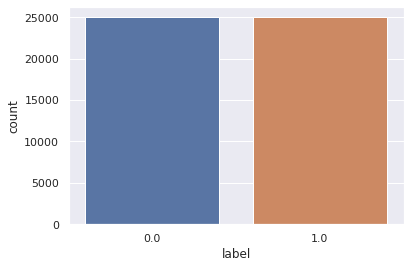

In [31]:
labelDF=pd.DataFrame({'label':label})
sns.countplot(x='label', data=labelDF)

# For below analysis it is clear that data has equel distribution of sentiments.This will help us building a good model.

In [32]:
# Creating train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.20, random_state=1)

In [33]:
X_train.shape

(40000, 10000)

In [34]:
X_test.shape

(10000, 10000)

In [35]:
# Let's create sequential model,In deep learning, a Sequential model is a linear stack of layers, where you can simply add layers one after the other

from keras.utils import to_categorical
from keras import models
from keras import layers

In [36]:
model = models.Sequential()
# Input - Layer
# Note that we set the input-shape to 10,000 at the input-layer because our reviews are 10,000 integers long.
# The input-layer takes 10,000 as input and outputs it with a shape of 50.
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
# Please note you should always use a dropout rate between 20% and 50%. # here in our case 0.3 means 30% dropout we are using dropout to prevent overfitting. 
# By the way, if you want you can build a sentiment analysis without LSTMs(Long Short-Term Memory networks), then you simply need to replace it by a flatten layer:
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu")) #ReLU" stands for Rectified Linear Unit, and it is a commonly used activation function in neural networks. 
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid")) #adds another Dense layer to the model, but with a single neuron instead of 50,i.e. out put layer,it produces the output predictions of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

In [39]:
#For early stopping 
# Stop training when a monitored metric has stopped improving.
# monitor: Quantity to be monitored.
# patience: Number of epochs with no improvement after which training will be stopped.
import tensorflow as tf #TensorFlow provides a wide range of tools and features for data processing, model building, model training, and model evaluation.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [40]:
# We use the “adam” optimizer, an algorithm that changes the weights and biases during training.
# During training, the weights and biases of a machine learning model are updated iteratively to minimize the difference between the model's predictions and the actual outputs.
# We also choose binary-crossentropy as loss (because we deal with binary classification) and accuracy as our evaluation metric.

model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [41]:
# Now we're able to train our model. We'll do this with a batch_size of 500 and only for two epochs because I recognized that the model overfits if we train it longer.
# batch size defines the number of samples that will be propagated through the network.
# For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. 
# The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. 
# Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. 
# We can keep doing this procedure until we have propagated all samples through of the network. 
# Problem might happen with the last set of samples. In our example, we've used 1050 which is not divisible by 100 without remainder.
# The simplest solution is just to get the final 50 samples and train the network.
##The goal is to find the number of epochs that results in good performance on a validation dataset without overfitting to the training data.
results = model.fit(
 X_train, y_train,
 epochs= 2,
 batch_size = 500,
 validation_data = (X_test, y_test),
 callbacks=[callback]
) 

Epoch 1/2
80/80 [==============================] - 8s 80ms/step - loss: 0.4230 - accuracy: 0.8036 - val_loss: 0.2635 - val_accuracy: 0.8920
Epoch 2/2
80/80 [==============================] - 4s 55ms/step - loss: 0.2198 - accuracy: 0.9169 - val_loss: 0.2569 - val_accuracy: 0.8987


In [42]:
# Let's check mean accuracy of our model
print(np.mean(results.history["val_accuracy"])) # Good model should have a mean accuracy significantly higher than 50%

0.8953500092029572


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


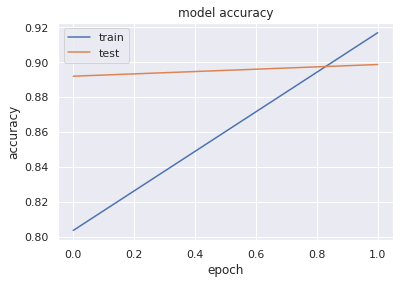

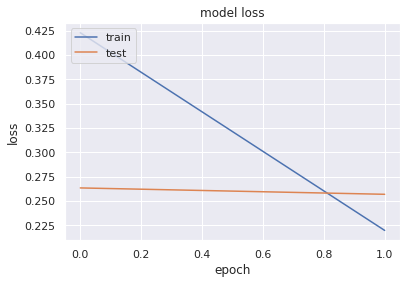

In [47]:
#Let's plot training history of our model

# list all data in history
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy']) #Plots the training accuracy of the model at each epoch.
plt.plot(results.history['val_accuracy']) #Plots the validation accuracy of the model at each epoch.
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


array([[0.17430142],
       [0.9865479 ],
       [0.86662334],
       ...,
       [0.9772741 ],
       [0.9754161 ],
       [0.9927141 ]], dtype=float32)

In [49]:
#Out put analysis,
#[0.9865479] is a single prediction value for a particular input sample in the test data. 
#It is the predicted probability of the positive sentiment class (class 1) for that input.
#Since the output activation function of the last layer of the model is sigmoid, which maps the predicted values to a range of [0,1]
#,the output values represent the probabilities of the positive class. 
#In this case, the probability of the positive class for the given input sample is 0.9865479, which is very close to 1, indicating that the model is highly confident in predicting the positive class for that input.

